## Part 2 - Exploratory Data Analysis

### Author: Johann Manukulasuriya

#### BrainStation, Fall 2021 Cohort

The first notebook consisted of importing and cleaning the data for the EDA and modelling sections. This notebook will invovle taking a closer look at that cleaned data. I will be creating dataframes for a select number of airlines for specific regions. For example, I assign a select number of Middle Eastern airlines to their own dataframe, and proceed to conduct basic EDA on them to look for any trends, differences, or similarities. 

Let's begin by import all the necessary libraries we'll need for our data analysis.

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load in the cleaned airline dataset
df = pd.read_csv('airlines_data_cleaned_finalized.csv')

# Check the dataset
df.head()

,airline,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination,week_of_year,month_of_year,year,day_of_month
0,Turkish Airlines,7,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,4,5,4,4,2,4,yes,London,Izmir,19,5,2019,8
1,Turkish Airlines,2,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,4,1,1,1,1,1,no,Istanbul,Bucharest,19,5,2019,7
2,Turkish Airlines,3,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,1,4,1,3,1,2,no,Rome,Prishtina,19,5,2019,7
3,Turkish Airlines,10,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,4,5,5,5,5,5,yes,Washington Dulles,Karachi,19,5,2019,6
4,Turkish Airlines,1,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,1,1,1,1,1,1,no,Mumbai,Dublin,19,5,2019,6


In [3]:
# Checking the shape of the dataset
df.shape

(34142, 18)

In [4]:
# Create an airline averages dataframe
df_airline_averages = df.groupby('airline')['overall',
                                             'seat_comfort',
                                             'cabin_service',
                                             'food_bev',
                                             'ground_service',
                                             'value_for_money',
                                             'recommended'].mean()
# Check
df_airline_averages = df_airline_averages.sort_values('overall', ascending=False)
display(df_airline_averages)

,overall,seat_comfort,cabin_service,food_bev,ground_service,value_for_money
airline,,,,,,
EVA Air,8.337838,4.265766,4.509009,4.022523,4.261261,4.396396
ANA All Nippon Airways,8.270936,4.014778,4.571429,4.014778,4.379310,4.246305
Garuda Indonesia,8.257757,4.317422,4.599045,4.100239,4.045346,4.326969
China Southern Airlines,8.059276,4.103926,4.611239,3.974596,4.170131,4.368745
Aegean Airlines,7.912162,3.891892,4.415541,3.935811,3.888514,4.003378
...,...,...,...,...,...,...
WOW air,2.878543,2.018219,2.382591,2.180162,1.910931,2.076923
Vueling Airlines,2.777434,1.913447,2.112828,2.448223,1.791345,1.948995
American Airlines,2.707094,2.154233,2.320824,2.286499,1.836156,1.852174


We can see that our airline averages dataframe contains 75 different airlines and we have a nice summarized dataframe of each airline's average score for each category, sorted from highest to lowest. However, for the data analysis, I will be creating a smaller dataframe of airlines based on region. Having a dataframe containing 5-7 airlines of the same region will allow for a more in-depth analysis, less cluttered visuals, and help paint a report of how these airlines are performing in relation with each other, which will help future travellers in their decision making process of picking the right airline for their travels. 

Therefore, the EDA portion of this project will focus on examining the average scores of 6 Middle Eastern airlines - Emirates, Qatar Airways, Turkish Airlines, Etihad Airways, Gulf Air, and Saudi Arabian Airlines. The following visuals will contain the average distribution of their service scores - seat comfort, cabin service, entertainment, ground service, food/beverage, and value for money - during the year, visuals of the 'Yes Recommend' percentages for each airline, and by each traveller type, as well as an analysis on one of the Middle Eastern airlines. 

Below is the beginning of the analysis.

#### EDA: Middle Eastern Airlines

The first step is to create a new dataframe containing the selected Middle Eastern airlines.

In [5]:
# Create a dataframe for Middle Eastern airlines
middle_eastern_airlines = df[(df['airline'] == 'Emirates') | (df['airline'] == 'Qatar Airways') 
                             | (df['airline'] == 'Turkish Airlines') | (df['airline'] == 'Etihad Airways')
                             | (df['airline'] == 'Gulf Air') | (df['airline'] == 'Saudi Arabian Airlines')
                                    ]
middle_eastern_airlines.shape

(4067, 18)

Next we can save this dataframe to a CSV type file to perform basic data analyses in a Tableau file for presentation purposes.

In [6]:
# Save the airline data
middle_eastern_airlines.to_csv('me_airlines.csv', index=False)

With the dataframe created, I can create a quick plot to see the number of reviews/flights for each airline.

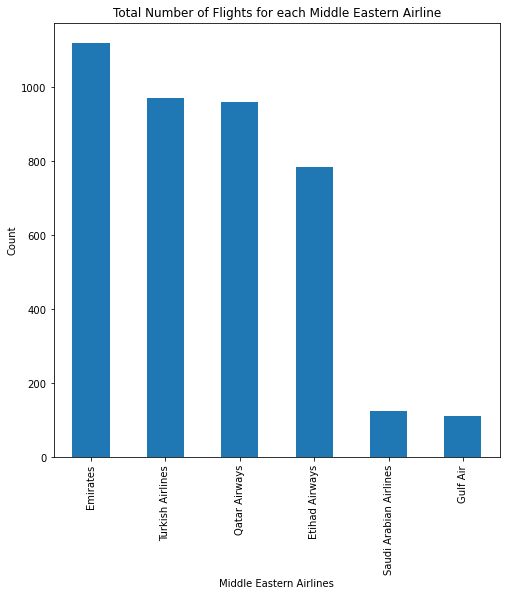

In [6]:
# Check the count for each Middle Eastern airline
plt.figure(figsize=(8,8))
middle_eastern_airlines['airline'].value_counts().plot(kind='bar')
plt.xlabel('Middle Eastern Airlines')
plt.ylabel('Count')
plt.title('Total Number of Flights for each Middle Eastern Airline')

plt.show()

We can see almost immediately that Emirates, Turkish Airlines, Qatar Airways, and Etihad Airways are the more popular airlines when compared to Gulf Air and Saudi Arabian Airlines. We have ~1100 flights for Emirates, ~950 flights for both Turkish Airlines and Qatar Airways, with ~800 flights for Etihad Airways. Both Gulf Air and Saudi Arabian Airlines come in with ~150 flights for each of them. The preliminary conclusions we can take from the breakdown of flights here is that travellers would be more inclined to travel on Emirates, Turkish, Qatar, and Etihad compared to Gulf Air or Saudi Arabian. 

Let's take a look at the traveller type breakdown for each airline.

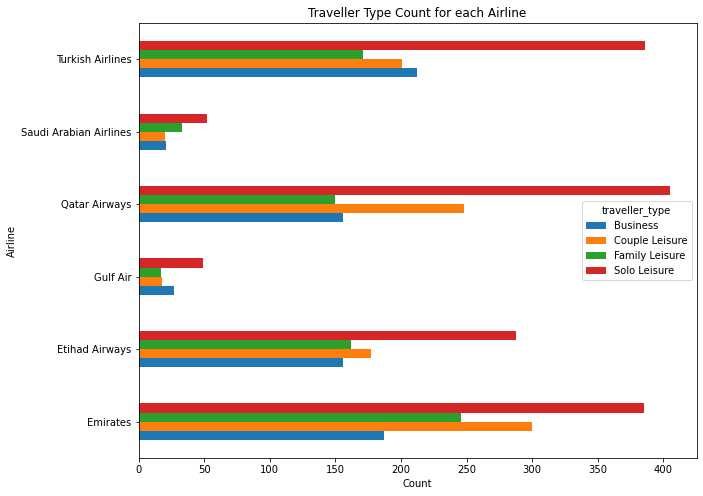

In [7]:
# Traveller type breakdown for each airline
middle_eastern_airlines.groupby(['airline','traveller_type'])['traveller_type'].count().unstack().plot(kind="barh", figsize=(10,8))
plt.xlabel('Count')
plt.ylabel('Airline')
plt.title('Traveller Type Count for each Airline')
plt.show()

The most common type of traveller is the Solo Leisure traveller among these airlines, and based on initial analysis, they are more likely to pick either Emirates, Qatar Airways or Turkish Airlines for their travels, with each carrier averaging ~390 Solo Leisure travellers between the three of them. 

Based on count, Couple Leisure travellers seem to prefer Emirates, with Qatar Airways coming in a close second. And it's the same case for Family Leisure travellers, picking Emirates over the other airlines in the region. However, it appears Business travellers prefer flying on Turkish Airlines. Now it is important to remember that the dataset does not contain information such as traveller's nationality, so it is impossible to say whether these travellers are from the same country as the airline and are therefore biased in their airline selection. But for now, Turkish Airlines has the edge in attracting Business travellers over its competitors. 

Next, let's check the relationship between *Value for Money* and *Traveller Type*

In [8]:
# Perform an analysis between the relationship of traveller type and value for money score
# Create a dataframe based on traveller type and value for money (vfm)
me_average_vfm_traveller = middle_eastern_airlines.groupby(['airline',
                                                            'traveller_type'])['value_for_money'].agg('mean').reset_index()

# Assign new column name for Average Value for Money (VFM) score
me_average_vfm_traveller.rename(columns={'value_for_money': 'Avg VFM Score'}, inplace=True)

# Display
me_average_vfm_traveller.head()

,airline,traveller_type,Avg VFM Score
0,Emirates,Business,3.112299
1,Emirates,Couple Leisure,3.116667
2,Emirates,Family Leisure,3.077236
3,Emirates,Solo Leisure,3.303896
4,Etihad Airways,Business,2.615385


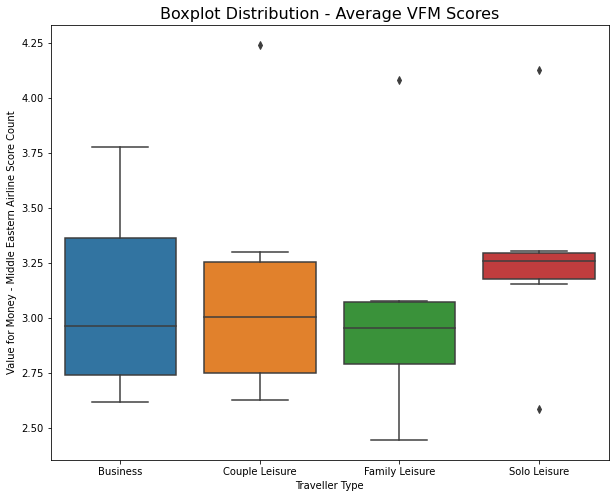

In [9]:
# Create a boxplot distribution of traveller type and value for money for Middle Eastern airlines
plt.figure(figsize=(10,8))

sns.boxplot(x='traveller_type', y='Avg VFM Score', data=me_average_vfm_traveller)
plt.xlabel('Traveller Type')
plt.ylabel('Value for Money - Middle Eastern Airline Score Count')
plt.title('Boxplot Distribution - Average VFM Scores', fontsize=16)

plt.show()

The visual above is a boxplot graph that presents the spread of average *Value for Money* scores given by each traveller type for all Middle Eastern airlines. We can see that the Middle Eastern carriers performed relatively well, having an average score of ~3.0 among all travellers. The Business traveller has the largest spread, with the maximum score of 3.8, whereas Family Leisure travellers have provided the lowest score (2.4). 

Solo Leisure travellers have the smallest range of scores, indicating relative consistency among all Middle Eastern carriers, and have given the highest average VFM score of ~3.25. The reason I picked the *Value for Money* category is because when travelling, price does matter. However, this visual doesn't convey how each airline did in this category. Let's look at that below: 

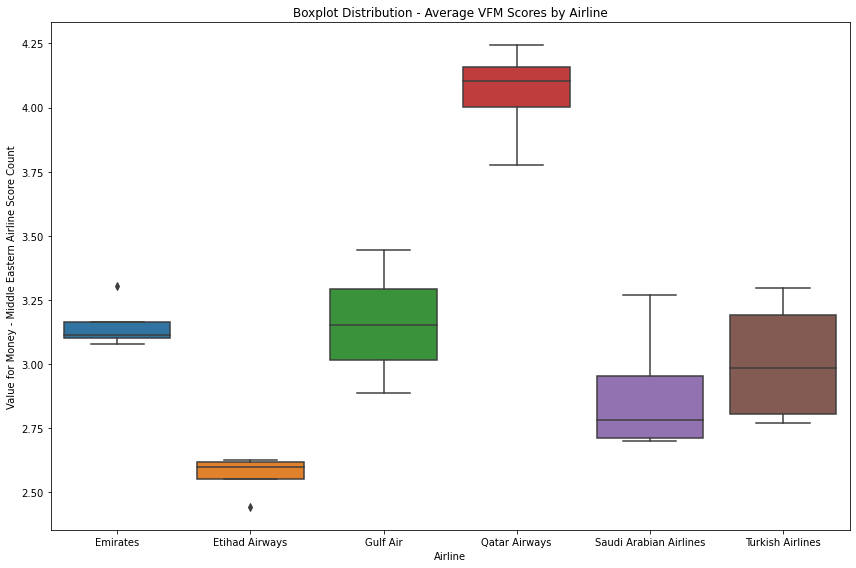

In [10]:
# Create a boxplot distribution of airlinee and value for money for Middle Eastern airlines
plt.figure(figsize=(12,8))

sns.boxplot(x='airline', y='Avg VFM Score', data=me_average_vfm_traveller)
plt.xlabel('Airline')
plt.ylabel('Value for Money - Middle Eastern Airline Score Count')
plt.title('Boxplot Distribution - Average VFM Scores by Airline')
plt.tight_layout()

plt.show()

We see greater variation for each airline compared to those of traveller types. The airline that immediately stands out is Qatar Airways, having an average VFM score of ~4.1, and is head and shoulders above its competition in this category. Both Emirates and Etihad Airways have the shortest range, indicating consistency. However, in the case for Etihad Airways, that is not a good feature as they have the lowest average VFM score of ~2.6.

It is a bit of a surprise to see Turkish Airlines have a lower average VFM score compared to Emirates and Gulf Air, considering this airline has the second highest number of reviews in this dataset, and has a higher VFM score than Etihad and Saudi Arabian. This is definitely a statistic that travellers can look at when planning what airline to take, either flying to Turkey, or transitioning through Turkey. And this is a valuable statistic for Turkish Airlines themselves to investigate. 

Next, let's take a look at the

However, when we examine the boxplots for each airline's average 'Value for Money' score, Qatar Airways is highly rated with average score of greater than 4. There is little variation in the average 'Value for Money' scores for Emirates and Etihad, whereas we see the greatest distribution of scores for Turkish Airlines. Etihad Airways has the worst average 'Value for Money' score among the four Middle Eastern carriers. 

Next let's create a visual representing the percentage of 'Yes' recommendations for each Middle Eastern carrier.

In [11]:
# Create a dataframe for recommended airlines based on count
recommended_per_me_airline = middle_eastern_airlines.groupby(middle_eastern_airlines['airline'])['recommended'].value_counts()

# Convert to dataframe
recommended_per_me_airline = pd.DataFrame(recommended_per_me_airline)

# Create a new Count column
recommended_per_me_airline.columns = ['Count']
recommended_per_me_airline = recommended_per_me_airline.reset_index()

# Display
recommended_per_me_airline.head()

,airline,recommended,Count
0,Emirates,yes,576
1,Emirates,no,542
2,Etihad Airways,no,530
3,Etihad Airways,yes,253
4,Gulf Air,yes,60


In [12]:
# Pivot to get the no and yes counts on the same row
recommended_per_me_airline = recommended_per_me_airline.pivot(index='airline', 
                                                              columns='recommended', 
                                                              values='Count').reset_index()
# Display
recommended_per_me_airline

recommended,airline,no,yes
0,Emirates,542,576
1,Etihad Airways,530,253
2,Gulf Air,51,60
3,Qatar Airways,182,777
4,Saudi Arabian Airlines,61,65
5,Turkish Airlines,509,461


In [13]:
# Assign no/yes recommended variables
no_recommended = recommended_per_me_airline['no']
yes_recommended = recommended_per_me_airline['yes']

# calculate percentage yes recommended
recommended_per_me_airline['yes_recommend_pct'] = yes_recommended/(no_recommended+yes_recommended)*100
recommended_per_me_airline

recommended,airline,no,yes,yes_recommend_pct
0,Emirates,542,576,51.520572
1,Etihad Airways,530,253,32.311622
2,Gulf Air,51,60,54.054054
3,Qatar Airways,182,777,81.021898
4,Saudi Arabian Airlines,61,65,51.587302
5,Turkish Airlines,509,461,47.525773


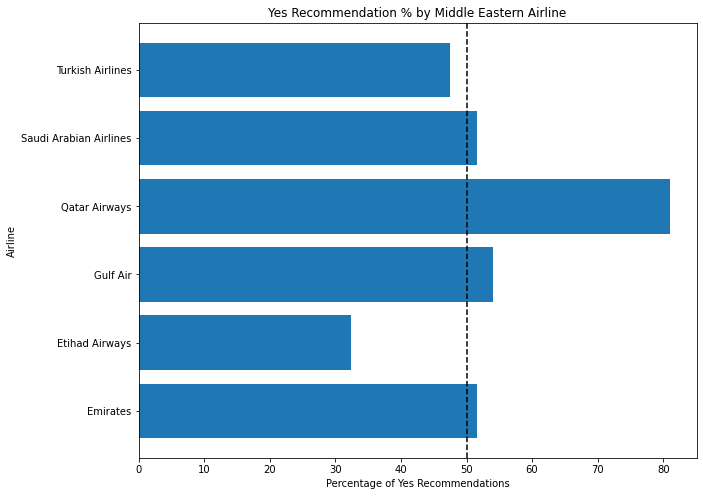

In [14]:
# Plot yes percentage by airline
plt.figure(figsize=(10,8))

plt.barh(recommended_per_me_airline['airline'], recommended_per_me_airline['yes_recommend_pct']);
plt.xlabel('Percentage of Yes Recommendations')
plt.ylabel('Airline')
plt.title('Yes Recommendation % by Middle Eastern Airline')
plt.axvline(50, color='black', linestyle='--')

plt.show()

I arbitrarily picked a 'Yes Recommend' percentage of 50% to see how many airlines in this dataframe would meet that threshold. If at least 50% of an airlines' customers would recommend them, I would consider that a success as not only does that mean that they are recommending other family members/friends/strangers to fly the airline, but that also means that there is a high likelihood that they themselves will fly the airline again in the future if given the opportunity. 

Qatar Airways immediately stands out in this visual, with almost 80% of its travellers recommending the airline. Despite a low number of reviews for Gulf Air and Saudi Arabian Airlines, over 50% of their travellers recommended them as well, indicating they provide services on par with Emirates and Turkish Airlines. 

Etihad Airways, sadly, performed the worst, with ~33% of their travellers recommending the airline. We can check the 'Yes Recommend' % by Traveller Type next.

In [15]:
# Create a dataframe exploring the relationship between recommended and traveller type
me_traveller_recommended = middle_eastern_airlines.groupby(['traveller_type'])['recommended'].value_counts()

# Create a dataframe traveller_recommend breakdown
me_traveller_recommended = pd.DataFrame(me_traveller_recommended)

# Assign a Count column
me_traveller_recommended.columns = ['Count']
me_traveller_recommended = me_traveller_recommended.reset_index()

# Display
me_traveller_recommended

,traveller_type,recommended,Count
0,Business,yes,391
1,Business,no,368
2,Couple Leisure,yes,522
3,Couple Leisure,no,442
4,Family Leisure,no,401
5,Family Leisure,yes,378
6,Solo Leisure,yes,901
7,Solo Leisure,no,664


In [16]:
# Pivot to get the positive and negative counts on the same row
me_traveller_recommended = me_traveller_recommended.pivot(index='traveller_type', 
                                                          columns='recommended', 
                                                          values='Count').reset_index()
# Display
me_traveller_recommended

recommended,traveller_type,no,yes
0,Business,368,391
1,Couple Leisure,442,522
2,Family Leisure,401,378
3,Solo Leisure,664,901


In [17]:
# Assign no/yes recommended variables
no_traveller_recommended = me_traveller_recommended['no']
yes_traveller_recommended = me_traveller_recommended['yes']

# calculate percentage yes recommended
me_traveller_recommended['yes_recommend_pct'] = yes_traveller_recommended/(no_traveller_recommended+yes_traveller_recommended)*100
me_traveller_recommended

recommended,traveller_type,no,yes,yes_recommend_pct
0,Business,368,391,51.515152
1,Couple Leisure,442,522,54.149378
2,Family Leisure,401,378,48.523748
3,Solo Leisure,664,901,57.571885


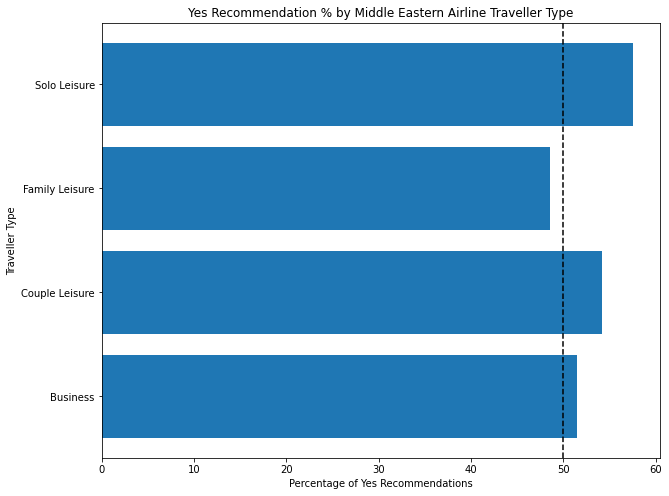

In [18]:
# Plot yes percentage by traveller type for Middle Eastern carriers
plt.figure(figsize=(10,8))

plt.barh(me_traveller_recommended['traveller_type'], me_traveller_recommended['yes_recommend_pct']);
plt.xlabel('Percentage of Yes Recommendations')
plt.ylabel('Traveller Type')
plt.title('Yes Recommendation % by Middle Eastern Airline Traveller Type')
plt.axvline(50, color='black', linestyle='--')

plt.show()

It looks like all Traveller types would recommend flying on Middle Eastern carriers. However, do keep in mind that this is not representative of an individual airlines' traveller type 'Yes Recommend' % breakdown. I will be performing a more in-depth analysis on an individual Middle Eastern carrier that will paint a better representation of the data. 

Next, let's look at the Overall score distribution per month.

In [19]:
# Average overall scores per month
me_average_overall_per_month = middle_eastern_airlines.groupby(['airline',
                                                                'month_of_year'])['overall'].agg('mean').reset_index()

# Assign a new column name
me_average_overall_per_month.rename(columns={'overall': 'Avg Overall Score'}, inplace=True)

# Displau
me_average_overall_per_month

,airline,month_of_year,Avg Overall Score
0,Emirates,1,4.961538
1,Emirates,2,5.347368
2,Emirates,3,5.666667
3,Emirates,4,5.453488
4,Emirates,5,5.820000
...,...,...,...
67,Turkish Airlines,8,4.761364
68,Turkish Airlines,9,4.831461
69,Turkish Airlines,10,5.320513
70,Turkish Airlines,11,5.348315


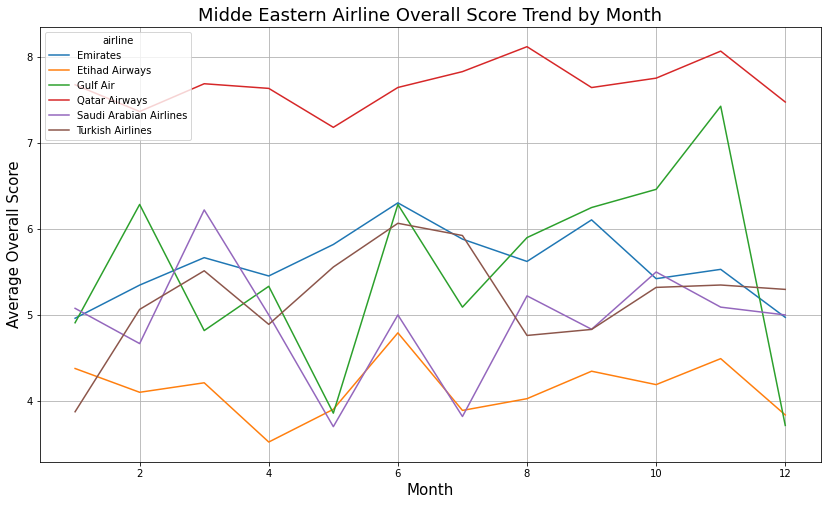

In [20]:
# Create a plot comparing the trend of overall scores for Middle Eastern carriers per month
plt.figure(figsize=(14,8))

sns.lineplot(data=me_average_overall_per_month, x='month_of_year', y='Avg Overall Score', hue='airline')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Overall Score', fontsize=15)
plt.title('Midde Eastern Airline Overall Score Trend by Month', fontsize=18)
plt.grid()

plt.show()

On the Overall score scale (rated from 1 - 10), Qatar Airways performs significantly better than the other Middle Eastern carriers, maintaining an average Overall score of ~7.6 throughout the year. The rest of the Middle Eastern airlines grouped up tightly, with all of them receiving higher Overall scores in the month of June, most likely due to the rush/start of summer vacation. However, all carriers, except for Qatart Airways see a drop in the Overall score in July right after. This can be another important point of investigation for the airline executives. 

Potential travellers may also find this insightful as they can plan ahead by selecting the best possible airline based on the month they travel. Next, we can begin for each service provided by each airline to see how they compare against their competition:

##### Cabin Service Trend

In [21]:
# Average cabin service scores per month
me_average_cabinservice_per_month = middle_eastern_airlines.groupby(['airline',
                                                                     'month_of_year'])['cabin_service'].agg('mean').reset_index()

# Assign new column name
me_average_cabinservice_per_month.rename(columns={'cabin_service': 'Avg Cabin Service Score'}, inplace=True)
me_average_cabinservice_per_month

,airline,month_of_year,Avg Cabin Service Score
0,Emirates,1,2.855769
1,Emirates,2,2.936842
2,Emirates,3,3.313131
3,Emirates,4,3.197674
4,Emirates,5,3.140000
...,...,...,...
67,Turkish Airlines,8,3.125000
68,Turkish Airlines,9,3.224719
69,Turkish Airlines,10,3.333333
70,Turkish Airlines,11,3.235955


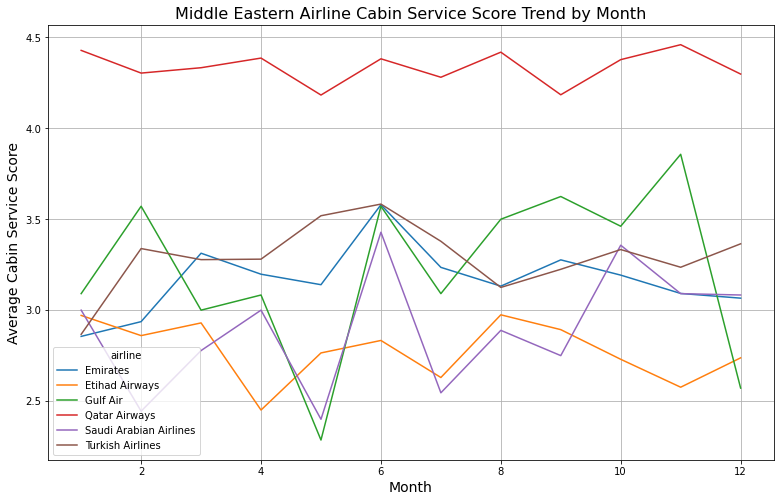

In [22]:
# Create a plot displaying the trend of cabin service scores for Middle Eastern Airlines
plt.figure(figsize=(13,8))

sns.lineplot(data=me_average_cabinservice_per_month, x='month_of_year', y='Avg Cabin Service Score', hue='airline')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Cabin Service Score', fontsize=14)
plt.title('Middle Eastern Airline Cabin Service Score Trend by Month', fontsize=16)
plt.grid()

plt.show()

When it comes to Cabin Service, Qatar Airways once again performs incredibly well compared to its competition. It appears both Gulf Air and Saudi Arabian Airlines experience the greatest fluctuations in Cabin Service scores throughout the year, whereas Emirates, Turkish Airlines and Etihad Aiways perform consistently (which in Etihad's case, is not good).

##### Food and Beverage Trend

In [23]:
# Average food/bev scores per month
me_average_foodbev_per_month = middle_eastern_airlines.groupby(['airline', 
                                                                'month_of_year'])['food_bev'].agg('mean').reset_index()

# Assign new column name
me_average_foodbev_per_month.rename(columns={'food_bev': 'Avg Food_Bev Score'}, inplace=True)
me_average_foodbev_per_month

,airline,month_of_year,Avg Food_Bev Score
0,Emirates,1,2.865385
1,Emirates,2,3.000000
2,Emirates,3,3.313131
3,Emirates,4,3.337209
4,Emirates,5,3.420000
...,...,...,...
67,Turkish Airlines,8,3.125000
68,Turkish Airlines,9,3.460674
69,Turkish Airlines,10,3.589744
70,Turkish Airlines,11,3.651685


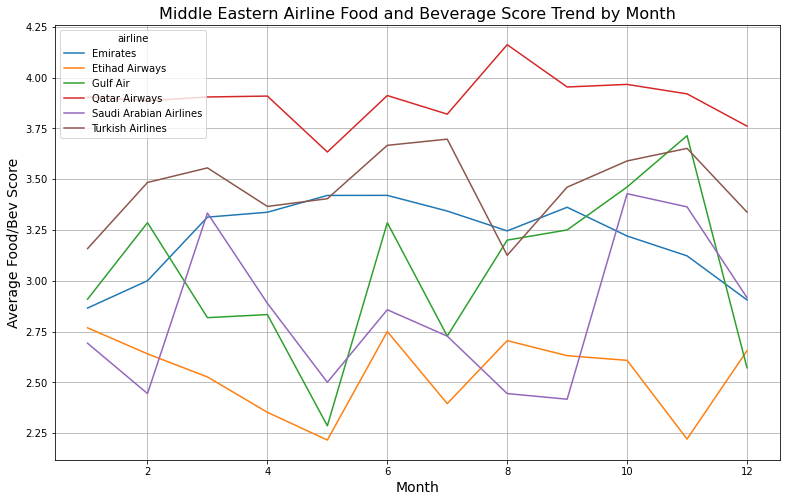

In [24]:
# Create a plot displaying the trend of food/bev scores for Middle Eastern Airlines
plt.figure(figsize=(13,8))

sns.lineplot(data=me_average_foodbev_per_month, x='month_of_year', y='Avg Food_Bev Score', hue='airline')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Food/Bev Score', fontsize=14)
plt.title('Middle Eastern Airline Food and Beverage Score Trend by Month', fontsize=16)
plt.grid()

plt.show()

We see much more variation in the Food/Bev scores Middle Eastern carrier this time. This could be because of changes in the food/beverage menus for each season and possibly for different routes. The airline could be experimenting with new meal/drink selections to see what type of food works best for the specific route their flying. But once again, it appears that Qatar Airways performs the best with a higher average score in Food/Bev scores compared to its competitors. And it appears that Etihad performs the worst consistently.

Let's take a look at the Ground Service scores next.

##### Ground Service Trend

In [25]:
# Average ground service scores per month
me_average_groundservice_per_month = middle_eastern_airlines.groupby(['airline',
                                                                      'month_of_year'])['ground_service'].agg('mean').reset_index()

# Assign new column name
me_average_groundservice_per_month.rename(columns={'ground_service': 'Avg Ground Service Score'}, inplace=True)
me_average_groundservice_per_month

,airline,month_of_year,Avg Ground Service Score
0,Emirates,1,2.836538
1,Emirates,2,3.105263
2,Emirates,3,3.040404
3,Emirates,4,3.127907
4,Emirates,5,3.060000
...,...,...,...
67,Turkish Airlines,8,2.295455
68,Turkish Airlines,9,2.292135
69,Turkish Airlines,10,2.448718
70,Turkish Airlines,11,2.775281


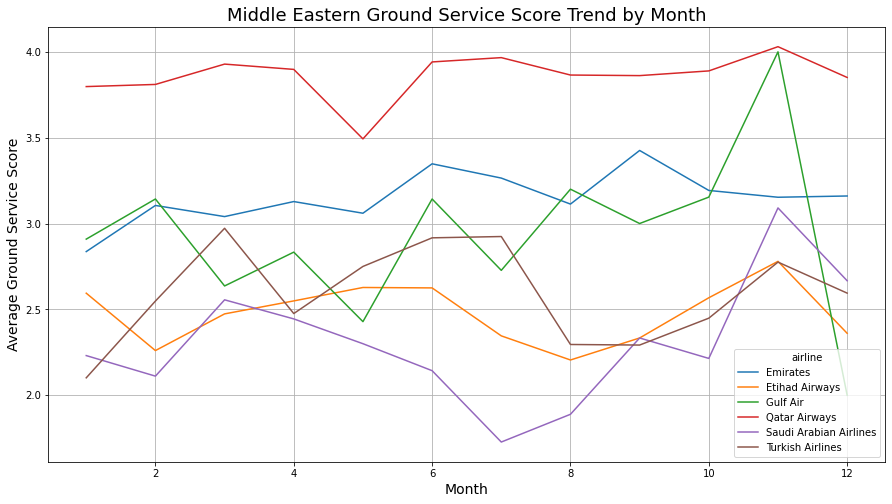

In [26]:
# Create a plot displaying the trend of ground service scores for Middle Eastern Airlines
plt.figure(figsize=(15,8))

sns.lineplot(data=me_average_groundservice_per_month, x='month_of_year', y='Avg Ground Service Score', hue='airline')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Ground Service Score', fontsize=14)
plt.title('Middle Eastern Ground Service Score Trend by Month', fontsize=18)
plt.grid()

plt.show()

Ground Service consists of the overall experience the traveller has from Check-in to the moment they board the flight. Once again, Qatar Airways performs the best in this category. Emirates also does extremely well, staying relatively consistent throughout the year unlike Gulf Air. It does have to be noted that most airlines (excluding Qatar Airways) sees a dip in Ground Service performance in the month of July. This requires further investigation.

##### Value for Money Trend

In [27]:
# Average value for money scores per month
me_average_vfm_per_month = middle_eastern_airlines.groupby(['airline',
                                                            'month_of_year'])['value_for_money'].agg('mean').reset_index()

# Assign new column name
me_average_vfm_per_month.rename(columns={'value_for_money': 'Avg Value for Money Score'}, inplace=True)
me_average_vfm_per_month

,airline,month_of_year,Avg Value for Money Score
0,Emirates,1,2.990385
1,Emirates,2,3.200000
2,Emirates,3,3.121212
3,Emirates,4,3.186047
4,Emirates,5,3.360000
...,...,...,...
67,Turkish Airlines,8,2.863636
68,Turkish Airlines,9,3.056180
69,Turkish Airlines,10,3.076923
70,Turkish Airlines,11,3.213483


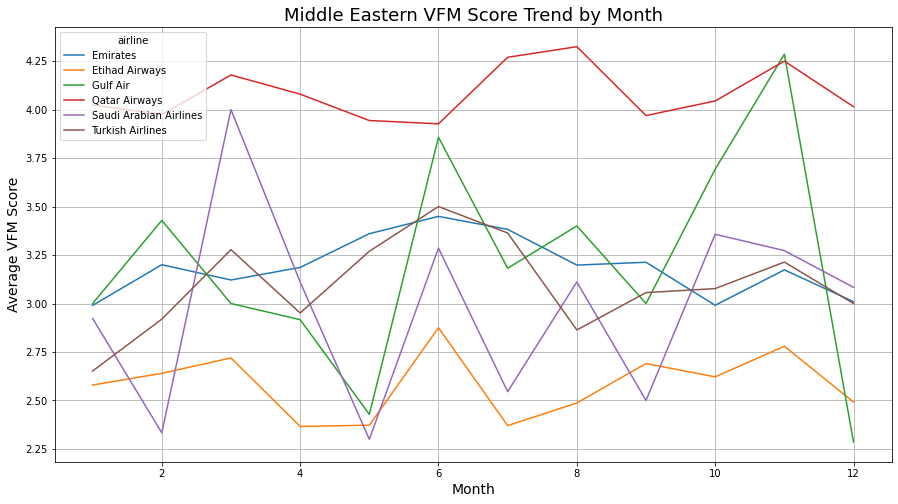

In [28]:
# Create a plot displaying the trend of value for money scores for Middle Eastern Airlines
plt.figure(figsize=(15,8))

sns.lineplot(data=me_average_vfm_per_month, x='month_of_year', y='Avg Value for Money Score', hue='airline')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average VFM Score', fontsize=14)
plt.title('Middle Eastern VFM Score Trend by Month', fontsize=18)
plt.grid()

plt.show()

Both Gulf Air and Saudi Arabian Airlines are inconsistent throughout the year when it comes to Value for Money. This could most likely be because of special promotions and discounts in order to compete with the other 4, more popular flown airlines, despite Etihad Airways coming in last here. 

##### Entertainment Trend

In [29]:
# Average entertainment scores per month
me_average_entertainment_per_month = middle_eastern_airlines.groupby(['airline',
                                                                      'month_of_year'])['entertainment'].agg('mean').reset_index()

# Assign new column name
me_average_entertainment_per_month.rename(columns={'entertainment': 'Avg Entertainment Score'}, inplace=True)
me_average_entertainment_per_month

,airline,month_of_year,Avg Entertainment Score
0,Emirates,1,3.971154
1,Emirates,2,3.673684
2,Emirates,3,4.040404
3,Emirates,4,3.953488
4,Emirates,5,3.860000
...,...,...,...
67,Turkish Airlines,8,3.261364
68,Turkish Airlines,9,3.314607
69,Turkish Airlines,10,3.307692
70,Turkish Airlines,11,3.325843


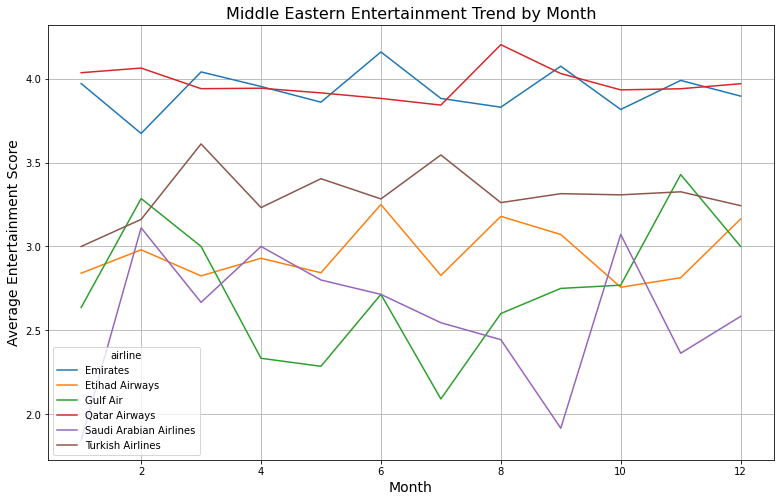

In [30]:
# Create a plot displaying the trend of entertainment scores for Middle Eastern Airlines
plt.figure(figsize=(13,8))

sns.lineplot(data=me_average_entertainment_per_month, x='month_of_year', y='Avg Entertainment Score', hue='airline')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Entertainment Score', fontsize=14)
plt.title('Middle Eastern Entertainment Trend by Month', fontsize=16)
plt.grid()

plt.show()

Both Emirates and Qatar Airways perform extremely well in the Entertainment category. Entertainment for airlines consists of the selection of Movies/Games/TV Shows/News, etc. that are available for a flight. It appears that Etihad Airways does not round out the bottom in this category, performing decetly well with Turkish Airlines rated slightly better above it. But it seems Gulf Air and Saudi Arabian cannot compete with the big four when it comes to Entertainment.

##### Seat Comfort Trend

In [31]:
# Average seat comfort scores per month
me_average_seatcomfort_per_month = middle_eastern_airlines.groupby(['airline', 
                                                                    'month_of_year'])['seat_comfort'].agg('mean').reset_index()

# Assign new column name
me_average_seatcomfort_per_month.rename(columns={'seat_comfort': 'Avg Seat Comfort Score'}, inplace=True)
me_average_seatcomfort_per_month

,airline,month_of_year,Avg Seat Comfort Score
0,Emirates,1,3.240385
1,Emirates,2,3.147368
2,Emirates,3,3.535354
3,Emirates,4,3.511628
4,Emirates,5,3.360000
...,...,...,...
67,Turkish Airlines,8,2.909091
68,Turkish Airlines,9,3.000000
69,Turkish Airlines,10,3.166667
70,Turkish Airlines,11,3.224719


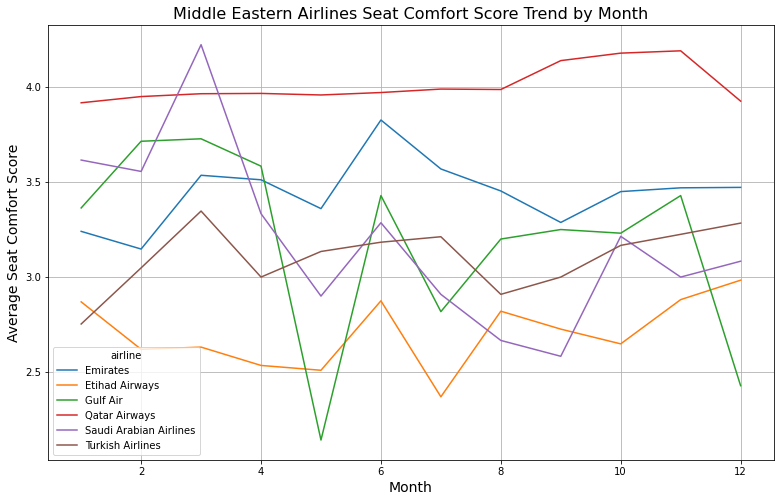

In [32]:
# Create a plot displaying the trend of seat comfort scores for Middle Eastern Airlines
plt.figure(figsize=(13,8))

sns.lineplot(data=me_average_seatcomfort_per_month, x='month_of_year', y='Avg Seat Comfort Score', hue='airline')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Seat Comfort Score', fontsize=14)
plt.title('Middle Eastern Airlines Seat Comfort Score Trend by Month', fontsize=16)
plt.grid()

plt.show()

There is once again high inconsistency for Gulf Air and Saudi Arabian Airlines. If these two airlines want to start attracting more potential travellers, they are going to have to start addressing the consistency issues when it comes to these categories. 

It appears that Qatar Airways, Turkish Airlines, and Emirates are the most consistently scored of the Middle Eastern airlines, while Etihad Airways appears to perform the worst in most categories.

The next step is performing an in-depth analysis on one airline. I have chosen Emirates.

##### Emirates Analysis

First let's create a dataframe for Emirates.

In [34]:
# Create a dataframe for Emirates
emirates = df[(df['airline'] == 'Emirates')]
emirates.head()

,airline,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination,week_of_year,month_of_year,year,day_of_month
1929,Emirates,6,✅ Trip Verified | After 1 month in Thailand an...,Solo Leisure,Business Class,5,2,4,5,2,4,no,Bangkok,Glasgow,19,5,2019,10
1930,Emirates,9,Not Verified | We travelled Emirates yet again...,Family Leisure,Economy Class,3,4,5,5,5,5,yes,Dubai,London Heathrow,19,5,2019,10
1931,Emirates,4,✅ Trip Verified | I booked the tickets with Em...,Solo Leisure,Economy Class,2,2,2,2,2,3,no,Kathmandu,Dubai,19,5,2019,6
1932,Emirates,9,✅ Trip Verified | I flew out LHR-DXB on econom...,Business,Business Class,5,5,4,5,4,4,yes,London,Dubai,18,5,2019,3
1933,Emirates,2,✅ Trip Verified | Dubai to Johannesburg. Absol...,Couple Leisure,Economy Class,2,1,3,3,1,1,no,Dubai,Johannesburg,18,5,2019,2


Let's create a plot of all the score categories to see if Emirates can improve in any one of them.

In [35]:
# Average all services for Emirates 
emirates_per_month = emirates.groupby(['airline','month_of_year'])['value_for_money',
                                                                                'seat_comfort',
                                                                                'cabin_service',
                                                                                'food_bev',
                                                                                'entertainment',
                                                                                'ground_service'].agg('mean').reset_index()
emirates_per_month.head()

,airline,month_of_year,value_for_money,seat_comfort,cabin_service,food_bev,entertainment,ground_service
0,Emirates,1,2.990385,3.240385,2.855769,2.865385,3.971154,2.836538
1,Emirates,2,3.200000,3.147368,2.936842,3.000000,3.673684,3.105263
2,Emirates,3,3.121212,3.535354,3.313131,3.313131,4.040404,3.040404
3,Emirates,4,3.186047,3.511628,3.197674,3.337209,3.953488,3.127907
4,Emirates,5,3.360000,3.360000,3.140000,3.420000,3.860000,3.060000


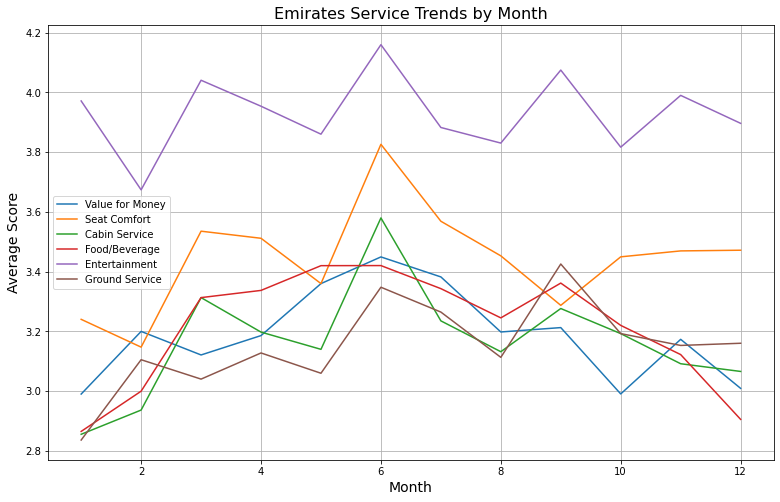

In [36]:
# Create a plot displaying the trend of all scores
plt.figure(figsize=(13,8))

sns.lineplot(data=emirates_per_month, x='month_of_year', y='value_for_money', label='Value for Money')
sns.lineplot(data=emirates_per_month, x='month_of_year', y='seat_comfort', label='Seat Comfort')
sns.lineplot(data=emirates_per_month, x='month_of_year', y='cabin_service', label='Cabin Service')
sns.lineplot(data=emirates_per_month, x='month_of_year', y='food_bev', label='Food/Beverage')
sns.lineplot(data=emirates_per_month, x='month_of_year', y='entertainment', label='Entertainment')
sns.lineplot(data=emirates_per_month, x='month_of_year', y='ground_service', label='Ground Service')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.title('Emirates Service Trends by Month', fontsize=16)
plt.grid()
plt.show()

It appears that Emirates excels in its Entertainment service, followed by Seat Comfort. The remaining services perform relatively consistently throughout the year, only dipping below 3.0 during the winter months which is expected as there is usually a lull in travel during the colder months. 

Next, let's look at the distribution of scores for some of their service. 

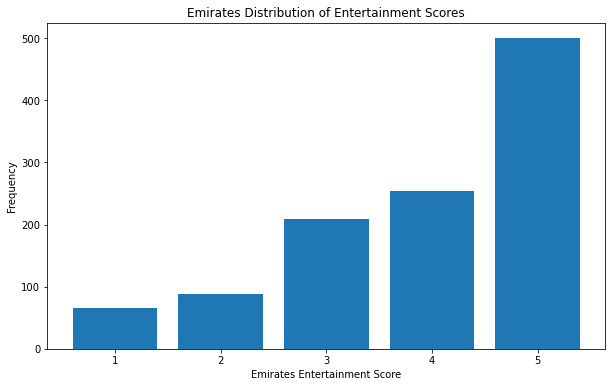

In [37]:
# Creating a summary dataframe of Average Score counts
entertainment_score_df = pd.DataFrame(emirates['entertainment'].value_counts())
entertainment_score_df.columns = ['Count']
entertainment_score_df.head()

# Plotting the Entertainment Score Distribution
plt.figure(figsize=(10,6))

plt.bar(entertainment_score_df.index, entertainment_score_df['Count'])
plt.xticks(entertainment_score_df.index)
plt.xlabel('Emirates Entertainment Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Emirates Distribution of Entertainment Scores', fontsize=12)

plt.show()

We can see a left skew of the data, indicating that many of the travellers were incredibly happy with the Entertainment selection on Emirates. Next, let's see the distribution of Food/Bev scores.

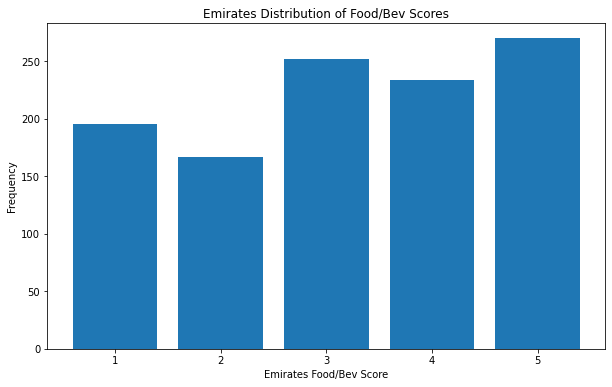

In [38]:
# Creating a summary dataframe of Average Score counts
foodbev_score_df = pd.DataFrame(emirates['food_bev'].value_counts())
foodbev_score_df.columns = ['Count']
foodbev_score_df.head()

# Plotting the Food_Bev Score Distribution
plt.figure(figsize=(10,6))

plt.bar(foodbev_score_df.index, foodbev_score_df['Count'])
plt.xticks(foodbev_score_df.index)
plt.xlabel('Emirates Food/Bev Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Emirates Distribution of Food/Bev Scores', fontsize=12)

plt.show()

There is a more even distribution of Food/Bev scores compared to the distribution of Entertainment scores. Let's check the distribution of Cabin Service next.

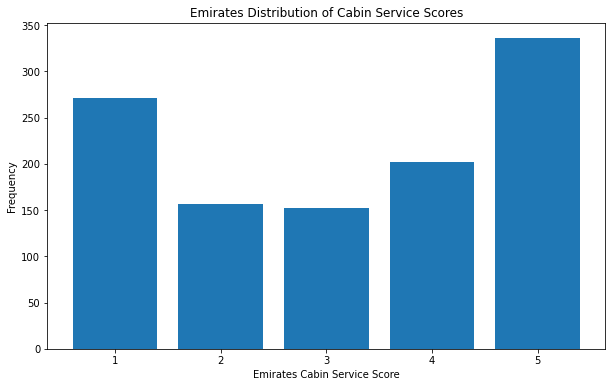

In [39]:
# Creating a summary dataframe of Average Score counts
cabin_service_score_df = pd.DataFrame(emirates['cabin_service'].value_counts())
cabin_service_score_df.columns = ['Count']
cabin_service_score_df.head()

# Plotting the Cabin Service Score Distribution
plt.figure(figsize=(10,6))

plt.bar(cabin_service_score_df.index, cabin_service_score_df['Count'])
plt.xticks(cabin_service_score_df.index)
plt.xlabel('Emirates Cabin Service Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Emirates Distribution of Cabin Service Scores', fontsize=12)

plt.show()

Here we can see a bi-modal distribution, with the majority of travellers either giving their cabin service experience a score of 1 or 5 most of the time. This is something Emirates can look into as they would not want to give travellers a bad experience when flying with them. Finally, let's look at the distribution of Value for Money.

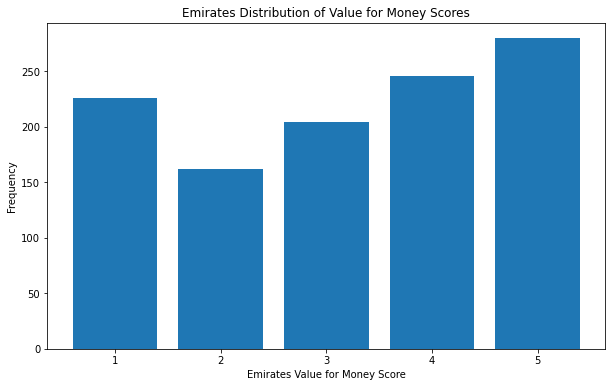

In [40]:
# Creating a summary dataframe of Average Score counts
vfm_score_df = pd.DataFrame(emirates['value_for_money'].value_counts())
vfm_score_df.columns = ['Count']
vfm_score_df.head()

# Plotting the VFM Score Distribution
plt.figure(figsize=(10,6))

plt.bar(vfm_score_df.index, vfm_score_df['Count'])
plt.xticks(vfm_score_df.index)
plt.xlabel('Emirates Value for Money Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Emirates Distribution of Value for Money Scores', fontsize=12)

plt.show()

This appears to be more of a even distribution, indicating that a traveller is just as likely to give their Value for Money flight experience a 1 to that of a 5.

Finally, I'd like to check the distribution of overall scores. 

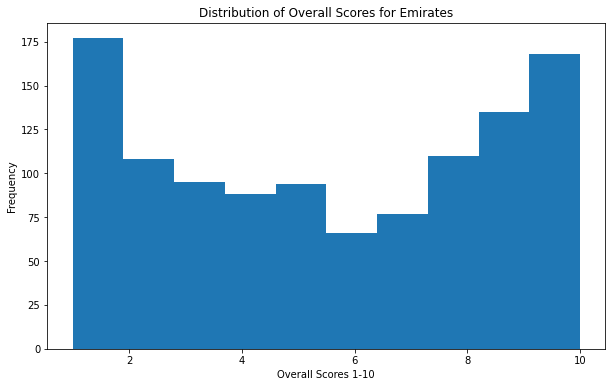

In [41]:
# Emirates Overall Score Distribution
plt.figure(figsize=(10,6))

plt.hist(emirates['overall'])
plt.xlabel('Overall Scores 1-10')
plt.xticks()
plt.ylabel('Frequency')
plt.title('Distribution of Overall Scores for Emirates')

plt.show()

It appears to be another bi-modal distribution, with many travellers either having a negative, or positive experience, with very minimal neutral experiences. These score distributions are all valuable insights that travellers and airlines alike can keep track of. It will help travellers in their selection of airlines based on what they're looking for, and it can help airlines actively monitor the quality of their services to track how they're performing and whether they can implement new strategies to improve some services.

Finally, I can move onto creating a visual representing the breakdown of 'Yes' recommendations based on the traveller type.

In [42]:
# Create a dataframe exploring the relationship between recommended and traveller type - Emirates
emirates_traveller_recommended = emirates.groupby(['traveller_type'])['recommended'].value_counts()

emirates_traveller_recommended = pd.DataFrame(emirates_traveller_recommended)
emirates_traveller_recommended.columns = ['Count']
emirates_traveller_recommended = emirates_traveller_recommended.reset_index()
emirates_traveller_recommended.head()

,traveller_type,recommended,Count
0,Business,yes,98
1,Business,no,89
2,Couple Leisure,no,155
3,Couple Leisure,yes,145
4,Family Leisure,no,131


In [43]:
# Pivot to get the yes and no counts on the same row
emirates_traveller_recommended = emirates_traveller_recommended.pivot(index='traveller_type',
                                                                      columns='recommended', 
                                                                      values='Count').reset_index()
emirates_traveller_recommended

recommended,traveller_type,no,yes
0,Business,89,98
1,Couple Leisure,155,145
2,Family Leisure,131,115
3,Solo Leisure,167,218


In [44]:
# Assign yes/no variables
no_traveller_recommended = emirates_traveller_recommended['no']
yes_traveller_recommended = emirates_traveller_recommended['yes']

# Calculate percentage yes recommended
emirates_traveller_recommended['yes_recommend_pct'] = yes_traveller_recommended/(no_traveller_recommended+yes_traveller_recommended)*100
emirates_traveller_recommended

recommended,traveller_type,no,yes,yes_recommend_pct
0,Business,89,98,52.406417
1,Couple Leisure,155,145,48.333333
2,Family Leisure,131,115,46.747967
3,Solo Leisure,167,218,56.623377


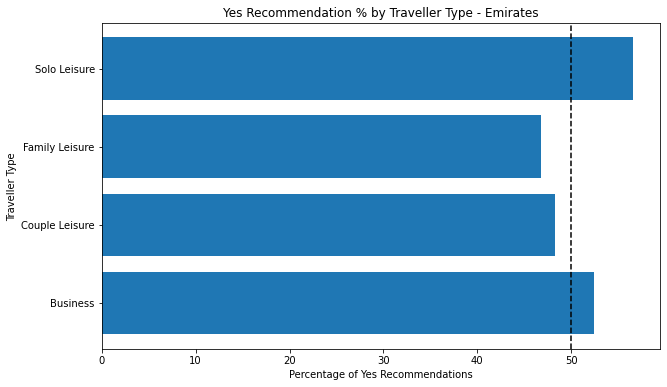

In [45]:
# plot yes percentage by traveller type for Emirates
plt.figure(figsize=(10,6))

plt.barh(emirates_traveller_recommended['traveller_type'], emirates_traveller_recommended['yes_recommend_pct']);
plt.xlabel('Percentage of Yes Recommendations')
plt.ylabel('Traveller Type')
plt.title('Yes Recommendation % by Traveller Type - Emirates')
plt.axvline(50, color='black', linestyle='--')

plt.show()

We can see ~approximately 50% of all traveller types would recommend flying Emirates for their travellers. However, if we want a more in-depth analysis to see when the highest percentage of 'Yes' recommends occurs for each month, we can also do an analysis for that to help future travellers see when's the best time to fly on Emirates. 

In [46]:
# Create a new dataframe for number of Yes Recommends per month
emirates_yes_per_month = emirates.groupby(emirates['month_of_year'])['recommended'].value_counts()

emirates_yes_per_month = pd.DataFrame(emirates_yes_per_month)
emirates_yes_per_month.columns = ['Count']
emirates_yes_per_month = emirates_yes_per_month.reset_index()
emirates_yes_per_month.head()

,month_of_year,recommended,Count
0,1,no,58
1,1,yes,46
2,2,no,50
3,2,yes,45
4,3,yes,53


In [47]:
# Pivot to get the yes and no counts on the same row
emirates_yes_per_month = emirates_yes_per_month.pivot(index='month_of_year', columns='recommended', values='Count')
emirates_yes_per_month.head()

recommended,no,yes
month_of_year,,
1,58,46
2,50,45
3,46,53
4,40,46
5,23,27


In [48]:
# Calculate percentage of yes

emirates_no = emirates_yes_per_month['no']
emirates_yes = emirates_yes_per_month['yes']

emirates_yes_per_month['Fraction Yes Recommend'] = emirates_yes/(emirates_no+emirates_yes)
emirates_yes_per_month.head()

recommended,no,yes,Fraction Yes Recommend
month_of_year,,,
1,58,46,0.442308
2,50,45,0.473684
3,46,53,0.535354
4,40,46,0.534884
5,23,27,0.540000


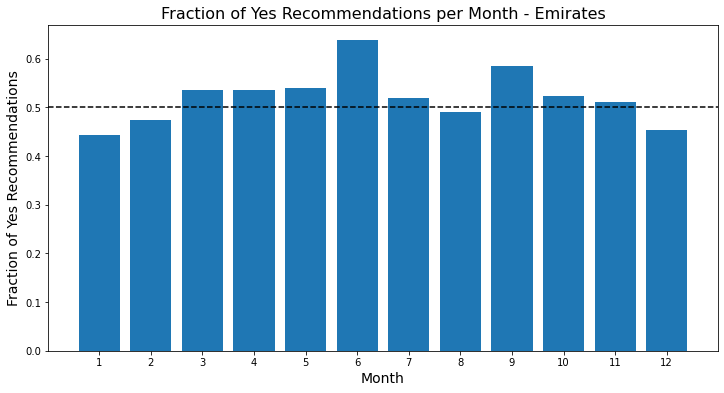

In [49]:
# Plot the results
plt.figure(figsize=(12,6))

plt.bar(emirates_yes_per_month.index, emirates_yes_per_month['Fraction Yes Recommend'])
plt.xticks(emirates_yes_per_month.index)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Fraction of Yes Recommendations', fontsize=14)
plt.title('Fraction of Yes Recommendations per Month - Emirates', fontsize=16)
plt.axhline(0.5, color='black', linestyle='--')

plt.show()

I picked 50% 'Yes' Recommendations as a sufficient evaluation because if I believe if at least 50% of your travellers would recommend the airline, not only does that mean that it increases the probability of bringing in new customers, I also believe that they would also fly the airline again if they had the choice, meaning a greater retention of customers. 

Analyzing the distribution above we can see that Emirates does boast a consistent percentage of Yes Recommendations per Month, with the greatest percentage being in June (Month 6). The only Months where the 'Yes' Recommendations do not come close to 50%, but are still greater than 40%, are the winter Months (Months 12, 1, 2). 

Next let's look at a quick count of the top 20 destinations for Emirates.

In [50]:
emirates['destination'].value_counts().head(20)

Dubai           192
Bangkok          72
London           62
Melbourne        35
Sydney           34
Singapore        31
Hong Kong        29
Manchester       27
Auckland         26
Colombo          21
Brisbane         20
New York         20
Perth            17
Kuala Lumpur     17
Delhi            13
Paris            13
Manila           11
Gatwick          10
Amsterdam        10
Milan             9
Name: destination, dtype: int64

Dubai appears as the top destination for Emirates, which is no surprise as Dubai is its hub, but also because more travellers seemed to leave a review for this destination specifically. Let's create a quick graph to give a sense of the true distribution.

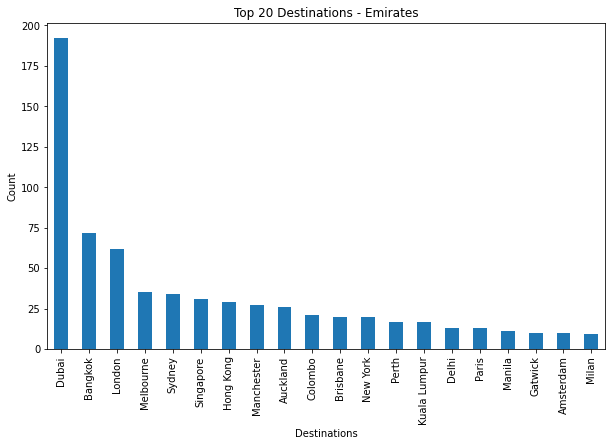

In [51]:
# Plot the top 20 destination count for Emirates
plt.figure(figsize=(10,6))

emirates['destination'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Destinations')
plt.ylabel('Count')
plt.title('Top 20 Destinations - Emirates')

plt.show()

It appears that the majority of travellers resided in Dubai and were simply returning to their home, with Bangkok and London coming second and third respectively. Let's conduct a quick breakdown of the yes percentage for the Dubai - London route.

In [52]:
# Create a dataframe where the destination == London
df_london = emirates.loc[emirates['destination'] == 'London']
df_london.head()

,airline,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination,week_of_year,month_of_year,year,day_of_month
1965,Emirates,2,✅ Trip Verified | Colombo to London via Dubai....,Couple Leisure,Economy Class,1,1,1,5,1,1,no,Colombo,London,12,3,2019,18
1966,Emirates,9,✅ Trip Verified | Kuala Lumpur to London via D...,Family Leisure,Economy Class,5,5,5,5,1,4,yes,Kuala Lumpur,London,12,3,2019,18
1969,Emirates,2,✅ Trip Verified | Dubai to London. After being...,Business,Economy Class,2,1,2,4,2,2,no,Dubai,London,11,3,2019,11
1994,Emirates,9,✅ Trip Verified | Dubai to London. I have been...,Business,Business Class,3,5,5,5,5,4,yes,Dubai,London,7,2,2019,11
2018,Emirates,3,✅ Trip Verified | Cape Town to London via Duba...,Solo Leisure,Economy Class,1,5,1,5,4,3,no,Cape Town,London,3,1,2019,14


In [53]:
df_london.shape

(62, 18)

In [54]:
# Create a dataframe exploring the relationship between recommended and traveller type for the London route
emirates_london = df_london.groupby(['traveller_type'])['recommended'].value_counts()

emirates_london = pd.DataFrame(emirates_london)
emirates_london.columns = ['Count']
emirates_london = emirates_london.reset_index()
emirates_london.head()

,traveller_type,recommended,Count
0,Business,yes,7
1,Business,no,5
2,Couple Leisure,no,11
3,Couple Leisure,yes,4
4,Family Leisure,no,13


In [55]:
# Pivot to get the yes and no counts on the same row
emirates_london = emirates_london.pivot(index='traveller_type', 
                                        columns='recommended', 
                                        values='Count').reset_index()
emirates_london

recommended,traveller_type,no,yes
0,Business,5,7
1,Couple Leisure,11,4
2,Family Leisure,13,6
3,Solo Leisure,5,11


In [56]:
# Assign yes/no variables
no_traveller_recommended = emirates_london['no']
yes_traveller_recommended = emirates_london['yes']

# Calculate percentage yes recommended
emirates_london['yes_recommend_pct'] = yes_traveller_recommended/(no_traveller_recommended+yes_traveller_recommended)*100
emirates_london

recommended,traveller_type,no,yes,yes_recommend_pct
0,Business,5,7,58.333333
1,Couple Leisure,11,4,26.666667
2,Family Leisure,13,6,31.578947
3,Solo Leisure,5,11,68.750000


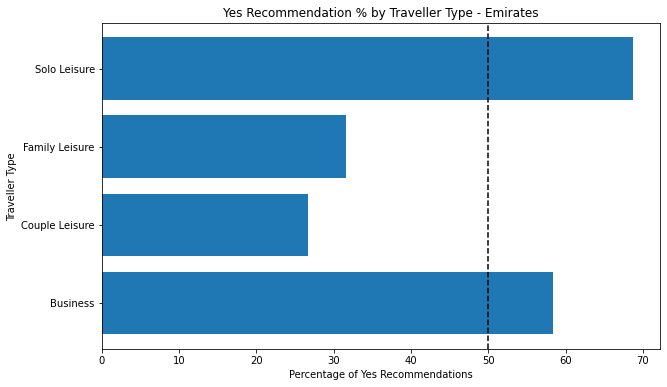

In [57]:
# plot yes percentage by traveller type for Southwest
plt.figure(figsize=(10,6))

plt.barh(emirates_london['traveller_type'], emirates_london['yes_recommend_pct']);
plt.xlabel('Percentage of Yes Recommendations')
plt.ylabel('Traveller Type')
plt.title('Yes Recommendation % by Traveller Type - Emirates')
plt.axvline(50, color='black', linestyle='--')

plt.show()

It can be seen that Solo Leisure and Business travellers would highly recommend flying Emirates to London, whereas Family and Couple travellers would say otherwise. Emirates can use this analysis as a benchmark to figure out what they can improve withint their own airline to make the travel experience much more pleasant than it is now for those two specific traveller types.

We can move onto statistical analysis of the Middle Eastern Airlines dataframe 

#### Statistical Analysis - Using the Middle Eastern Airlines Dataframe

I will be doing a basic Logistic Regression to see which independent variables are the most predictive of a Yes/No recommendation. But before I extract the independent and dependent variables from the dataframe, I would like to know whether the Airline has any relationship to the Yes/No recommendations.

For this, I will be performing a Chi-Square Test. A Chi-Square test is ideal in this situation because I will be checking for independence between two categorical columns. 

In [66]:
middle_eastern_airlines.head()

,airline,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination,week_of_year,month_of_year,year,day_of_month
0,Turkish Airlines,7,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,4,5,4,4,2,4,yes,London,Izmir,19,5,2019,8
1,Turkish Airlines,2,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,4,1,1,1,1,1,no,Istanbul,Bucharest,19,5,2019,7
2,Turkish Airlines,3,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,1,4,1,3,1,2,no,Rome,Prishtina,19,5,2019,7
3,Turkish Airlines,10,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,4,5,5,5,5,5,yes,Washington Dulles,Karachi,19,5,2019,6
4,Turkish Airlines,1,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,1,1,1,1,1,1,no,Mumbai,Dublin,19,5,2019,6


In [67]:
# Traveller Type relation with Recommended
airline_recommend = pd.crosstab(middle_eastern_airlines['airline'], middle_eastern_airlines['recommended'])
airline_recommend

recommended,no,yes
airline,,
Emirates,542,576
Etihad Airways,530,253
Gulf Air,51,60
Qatar Airways,182,777
Saudi Arabian Airlines,61,65
Turkish Airlines,509,461


Before I can go through with the Chi-Square test, I first have to state my null and alternative hypotheses:

- $H_0$: There is no relationship between the two categorical variables (independent).
- $H_A$: There is a relationship between the two (not independent).

I will reject the null hypothesis if the p-value is < 0.05.

In [68]:
result = stats.chi2_contingency(airline_recommend)
result

(449.44228667790657,
 6.479967610181279e-95,
 5,
 array([[515.42906319, 602.57093681],
        [360.98475535, 422.01524465],
        [ 51.17408409,  59.82591591],
        [442.12564544, 516.87435456],
        [ 58.08950086,  67.91049914],
        [447.19695107, 522.80304893]]))

It appears that there is a relationship between the two categorical variables, indicating that they are not independent of each other and that it does matter what Middle Eastern airline customers travel.

With the Chi-Square test out of the way, I can now move onto creating a baseline Logistic Regression model. The first step is to create a copy of the `middle_eastern_airlines` dataframe.

In [69]:
# Make copy
me_copy = middle_eastern_airlines.copy()
me_copy.head()

,airline,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination,week_of_year,month_of_year,year,day_of_month
0,Turkish Airlines,7,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,4,5,4,4,2,4,yes,London,Izmir,19,5,2019,8
1,Turkish Airlines,2,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,4,1,1,1,1,1,no,Istanbul,Bucharest,19,5,2019,7
2,Turkish Airlines,3,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,1,4,1,3,1,2,no,Rome,Prishtina,19,5,2019,7
3,Turkish Airlines,10,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,4,5,5,5,5,5,yes,Washington Dulles,Karachi,19,5,2019,6
4,Turkish Airlines,1,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,1,1,1,1,1,1,no,Mumbai,Dublin,19,5,2019,6


Next, I will convert the `recommended` column into binary values.

In [70]:
# Convert recommended column into binary
me_copy['recommended'] = np.where(me_copy['recommended'] == 'yes', 1, 0)

# Check
me_copy.head()

,airline,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,destination,week_of_year,month_of_year,year,day_of_month
0,Turkish Airlines,7,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,4,5,4,4,2,4,1,London,Izmir,19,5,2019,8
1,Turkish Airlines,2,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,4,1,1,1,1,1,0,Istanbul,Bucharest,19,5,2019,7
2,Turkish Airlines,3,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,1,4,1,3,1,2,0,Rome,Prishtina,19,5,2019,7
3,Turkish Airlines,10,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,4,5,5,5,5,5,1,Washington Dulles,Karachi,19,5,2019,6
4,Turkish Airlines,1,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,1,1,1,1,1,1,0,Mumbai,Dublin,19,5,2019,6


The `recommended` column has been successfully converted into a binary column. Next, I will be converting the `airline`, `traveller_type` and `cabin` columns into dummy variables as well and will be using the `.get_dummies()` method. I will also be dropping the first dummy column to reduce the possibility of multi-collinearity which can negatively affect the analysis later on. 

In [71]:
# Convert traveller_type and cabin to dummy variables
me_copy = pd.get_dummies(me_copy, columns=['airline', 'traveller_type', 'cabin'], drop_first=True)

# Check
me_copy.head()

,overall,customer_review,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,origin,...,airline_Gulf Air,airline_Qatar Airways,airline_Saudi Arabian Airlines,airline_Turkish Airlines,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
0,7,✅ Trip Verified | London to Izmir via Istanbul...,4,5,4,4,2,4,1,London,...,0,0,0,1,0,0,0,1,0,0
1,2,✅ Trip Verified | Istanbul to Bucharest. We ma...,4,1,1,1,1,1,0,Istanbul,...,0,0,0,1,0,1,0,1,0,0
2,3,✅ Trip Verified | Rome to Prishtina via Istanb...,1,4,1,3,1,2,0,Rome,...,0,0,0,1,0,0,0,1,0,0
3,10,✅ Trip Verified | Flew on Turkish Airlines IAD...,4,5,5,5,5,5,1,Washington Dulles,...,0,0,0,1,0,0,1,1,0,0
4,1,✅ Trip Verified | Mumbai to Dublin via Istanbu...,1,1,1,1,1,1,0,Mumbai,...,0,0,0,1,0,0,1,1,0,0


With the dummy variables created, I can now create the independent and dependent variables for the baseline Logistic Regression.

In [72]:
# Create the X (independent) and y (dependent) variables
X = me_copy.drop(columns = ['customer_review', 'origin',
                                 'destination', 'recommended'], axis=1)
y = me_copy['recommended']

Before I perform a baseline Logistic Regression, I want to create a correlation heatmap to see which features either correlate or not correlate highly with each other. 

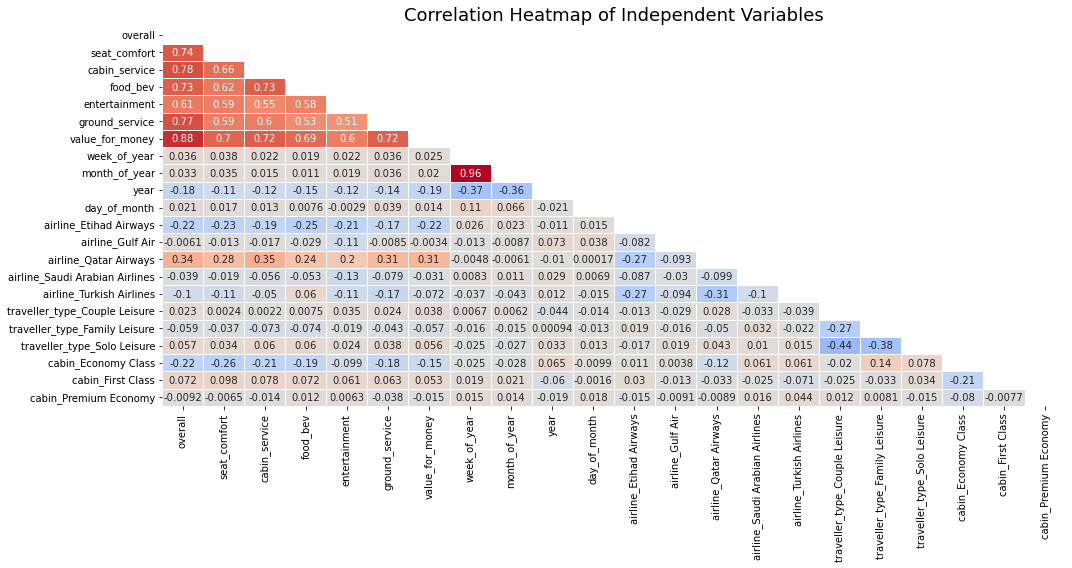

In [73]:
plt.figure(figsize=(15,8))

sns.heatmap(X.corr(), cmap='coolwarm', vmin=-1, mask=np.triu(X.corr()), annot=True, lw=1, cbar=False)
plt.title('Correlation Heatmap of Independent Variables', fontsize=18)
plt.tight_layout()

plt.show()

Looking at the correlation matrix, it appears there are quite a few independent variables that are highly correlated with each other:

- All of the scored categories - `seat_comfort`, `cabin_service`, `food_bev`, `entertainment`, `ground_service`, and `value_for_money` are highly correlated with each other. 
- It appears that `airline_Qatar Airways` and `cabin_First Class` are also highly correlated with these categories.
- `year` is negatively correlated with most of the scores.
- `month_of_year` and `week_of_year` also appear to be highly correlated which is not surprising considering they both increase as the year progresses on. 

I can now move onto creating a baseline Logistic Regression model.

In [74]:
# Add the constant
X_with_constant = sm.add_constant(X)

# Create the model
emirates_logit_model = sm.Logit(y, X_with_constant)

# Fit the model
emirates_logit_model = emirates_logit_model.fit()

# Look at the summary
emirates_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.153482
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            recommended   No. Observations:                 4067
Model:                          Logit   Df Residuals:                     4044
Method:                           MLE   Df Model:                           22
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.7776
Time:                        11:43:40   Log-Likelihood:                -624.21
converged:                       True   LL-Null:                       -2806.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            116.3785    130.334      0.893      0.372    -139.071     371.828
overall                            0.9378      0.056     16.669      0.000       0.828       1.048
seat_comfort                       0.1342      0.073      1.843      0.065      -0.009       0.277
cabin_service                      0.2692      0.071      3.796      0.000       0.130       0.408
food_bev                           0.1683      0.074      2.278      0.023       0.023       0.313
entertainment                      0.0625      0.073      0.860      0.390      -0.080       0.205
ground_service                     0.2527      0.063      4.005      0.000       0.129       0.376
value_for_money                    0.5114      0.094      5.447      0.000       0.327       0.695
week_of_year                       0.0022      0.015      0.147      0.883      -0.027       0.031
month_of_year                     -0.0127      0.065     -0.195      0.845      -0.140       0.115
year                              -0.0621      0.065     -0.962      0.336      -0.189       0.064
day_of_month                      -0.0043      0.008     -0.507      0.612      -0.021       0.012
airline_Etihad Airways            -0.2732      0.224     -1.220      0.222      -0.712       0.166
airline_Gulf Air                  -0.1287      0.490     -0.262      0.793      -1.090       0.833
airline_Qatar Airways             -0.0219      0.220     -0.100      0.920      -0.453       0.409
airline_Saudi Arabian Airlines     1.0984      0.431      2.546      0.011       0.253       1.944
airline_Turkish Airlines           0.1104      0.228      0.485      0.628      -0.336       0.557
traveller_type_Couple Leisure     -0.1572      0.230     -0.684      0.494      -0.608       0.294
traveller_type_Family Leisure      0.0260      0.252      0.103      0.918      -0.467       0.519
traveller_type_Solo Leisure        0.0727      0.209      0.348      0.728      -0.337       0.483
cabin_Economy Class               -0.5189      0.178     -2.920      0.004      -0.867      -0.171
cabin_First Class                 -0.1024      0.573     -0.179      0.858      -1.225       1.020
cabin_Premium Economy             -0.3550      1.227     -0.289      0.772      -2.760       2.050
==================================================================================================
"""

It appears that `overall`, `cabin_service`, `ground_service`, `food_bev`, `value_for_money`, `cabin_Economy Class`, and `airline_Saudi Arabian Airlines` were the only independent variables that were statistically significant while the others were not. Let me play around by dropping a few more unnecessary columns based on the correlation heatmap created a few steps earlier.

In [75]:
X.drop(columns=['cabin_Premium Economy', 'year', 'week_of_year', 'day_of_month',
               'traveller_type_Couple Leisure', 'traveller_type_Family Leisure',
               'traveller_type_Solo Leisure'], inplace=True)

Perform the baseline Logistic Regression again.

In [76]:
# Add the constant
X_with_constant = sm.add_constant(X)

# Create the model
emirates_logit_model = sm.Logit(y, X_with_constant)

# Fit the model
emirates_logit_model = emirates_logit_model.fit()

# Look at the summary
emirates_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.153806
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            recommended   No. Observations:                 4067
Model:                          Logit   Df Residuals:                     4051
Method:                           MLE   Df Model:                           15
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.7771
Time:                        11:43:40   Log-Likelihood:                -625.53
converged:                       True   LL-Null:                       -2806.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -9.0541      0.470    -19.257      0.000      -9.976      -8.133
overall                            0.9405      0.056     16.790      0.000       0.831       1.050
seat_comfort                       0.1272      0.072      1.763      0.078      -0.014       0.269
cabin_service                      0.2689      0.071      3.809      0.000       0.131       0.407
food_bev                           0.1746      0.073      2.381      0.017       0.031       0.318
entertainment                      0.0622      0.072      0.862      0.389      -0.079       0.204
ground_service                     0.2525      0.063      4.012      0.000       0.129       0.376
value_for_money                    0.5176      0.093      5.564      0.000       0.335       0.700
month_of_year                      0.0028      0.020      0.138      0.890      -0.037       0.043
airline_Etihad Airways            -0.2498      0.222     -1.127      0.260      -0.684       0.185
airline_Gulf Air                  -0.1118      0.488     -0.229      0.819      -1.069       0.845
airline_Qatar Airways             -0.0150      0.218     -0.069      0.945      -0.442       0.412
airline_Saudi Arabian Airlines     1.1190      0.428      2.616      0.009       0.281       1.957
airline_Turkish Airlines           0.1213      0.226      0.536      0.592      -0.322       0.565
cabin_Economy Class               -0.5019      0.172     -2.916      0.004      -0.839      -0.165
cabin_First Class                 -0.0376      0.573     -0.066      0.948      -1.161       1.086
==================================================================================================
"""

It appears that even dropping some features did not change the p-values for the rest of the other features. Even though `seat_comfort` is > 0.05, it is not that much higher, only at 0.078. Personally, I would also say that `seat_comfort` is also an independent variable that is statistically significant. 

Next, let me take a look at the coefficients using the odds ratio

In [77]:
# Logistic Regression Odds Ratio

logit_coef = pd.DataFrame(emirates_logit_model.params)
logit_coef.columns = ['Coefficients']
logit_coef['Odds Ratio'] = round(np.exp(emirates_logit_model.params), 5)
logit_coef['Affect'] = np.where(logit_coef['Coefficients'] > 0, 'Positive', 'Negative')
logit_coef.sort_values(by = 'Coefficients', ascending=False, inplace=True)

logit_coef

,Coefficients,Odds Ratio,Affect
airline_Saudi Arabian Airlines,1.118978,3.06172,Positive
overall,0.940514,2.56130,Positive
value_for_money,0.517611,1.67801,Positive
cabin_service,0.268854,1.30846,Positive
ground_service,0.252524,1.28727,Positive
food_bev,0.174650,1.19083,Positive
seat_comfort,0.127238,1.13569,Positive
airline_Turkish Airlines,0.121306,1.12897,Positive
entertainment,0.062177,1.06415,Positive
month_of_year,0.002830,1.00283,Positive


Let's take `cabin_service` to understand what the odds ratio is. The cabin service variable has an odds ratio of 1.308. This means that for every increase in the cabin service score, the odds of receiving a 'Yes' recommend increases by a factor 1.308.

#### Conclusions

It looks as if Qatar Airways stands head and shoulders over its competition in the region, and is an airline that is highly rated overall by all traveller types. Qatar Airways can use this analysis to ensure they remain consistent in the quality of their services and products, and to possibly improve upon them.

Airlines such as Emirates and Turkish Airlines can use this data to improve the quality and representation of some of their services. For example, Emirates could apply certain tweaks and improvements to their ground service and food/beverage service in the hopes of improving the traveller's flight experience that little bit more, which could inevitably lead to a higher number of yes recommendations through their reviews. 

We can move onto the Modelling notebook.